In [17]:
!pip install vertica_python

In [18]:
import vertica_python
import pandas as pd

In [19]:
conn_info = {'host': 'prodint.vertica-sbg.a.intuit.com',
             'port': 5433,
             'user': 'jcruz10',
             'password': 'Energy021089',
             'database': 'IDEA',
             # autogenerated session label by default,å
             'session_label': 'some_label',
            # default throw error on invalid UTF-8 results
              'unicode_error': 'strict',
             # SSL is disabled by default
               'ssl': True,
                 # using server-side prepared statements is disabled by default
                 'use_prepared_statements': False,
                 # connection timeout is not enabled by default
                 'connection_timeout': 8000}

# simple connection, with manual close
connection = vertica_python.connect(**conn_info)

In [20]:
# simple connection, with manual close
connection = vertica_python.connect(**conn_info)

In [21]:
sql_query="select country, qbo_channel_super_aggr_name, open_subs, date_for_day, week_num, week_num_544, signups, active_customers_past30days, month_start, month(month_start) as month_calc, week_start, week_start_544, quarter_start, year_fy, year_544, gns, logged_in_day, logged_in_week, logged_in_month, gns_retained_day31, gns_retained_day62, gns_retained_day92, added_txn_past31d_web, added_txn_first30d, manual_txns, total_txns, bank_txns_added_auto_rule, bank_txns_added from SBG_PUBLISHED.qbo_funnel_reporting where country = 'Brazil'"
data=pd.read_sql(sql_query,connection)

In [22]:
data.head(10)

,country,qbo_channel_super_aggr_name,open_subs,date_for_day,week_num,week_num_544,signups,active_customers_past30days,month_start,month_calc,...,logged_in_month,gns_retained_day31,gns_retained_day62,gns_retained_day92,added_txn_past31d_web,added_txn_first30d,manual_txns,total_txns,bank_txns_added_auto_rule,bank_txns_added
0,Brazil,Accountants,NaN,2019-11-17,17.0,17.0,NaN,6.0,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,Accountants,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,Brazil,Accountants,8.0,2019-11-17,17.0,17.0,0.0,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,15.0,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN
5,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
6,Brazil,Partnerships,37.0,2019-11-17,17.0,17.0,0.0,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Brazil,AppStore,NaN,2019-11-18,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,10.0,NaN,NaN
9,Brazil,AppStore,0.0,2019-11-18,17.0,17.0,35.0,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN


In [23]:
data.describe()

,open_subs,week_num,week_num_544,signups,active_customers_past30days,month_calc,year_fy,year_544,gns,logged_in_day,...,logged_in_month,gns_retained_day31,gns_retained_day62,gns_retained_day92,added_txn_past31d_web,added_txn_first30d,manual_txns,total_txns,bank_txns_added_auto_rule,bank_txns_added
count,51427.000000,215370.000000,217699.000000,51427.000000,33713.000000,215974.000000,215974.000000,217699.000000,51427.000000,29709.000000,...,604.000000,2278.000000,2107.000000,1959.000000,30707.000000,3833.000000,17333.000000,17333.000000,13674.000000,13674.000000
mean,55.398759,25.638664,24.865415,2.249538,33.061490,6.871966,2019.932381,2019.946706,0.416649,10.183682,...,53.965232,6.247147,5.278121,4.639102,26.948448,6.048265,120.304333,201.234985,17.139389,127.741919
std,185.299275,15.626975,15.538663,13.761619,61.041456,3.314423,0.771622,0.775968,6.828455,21.014271,...,147.173290,18.604237,16.246630,15.278916,44.760138,7.674349,222.650956,470.774789,70.847704,277.698098
min,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2018.000000,2018.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
25%,1.000000,12.000000,11.000000,0.000000,1.000000,4.000000,2020.000000,2020.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,9.000000,0.000000,10.000000
50%,3.000000,24.000000,23.000000,0.000000,4.000000,7.000000,2020.000000,2020.000000,0.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,4.000000,3.000000,27.000000,45.000000,0.000000,43.000000
75%,28.000000,40.000000,39.000000,0.000000,39.000000,10.000000,2020.000000,2020.000000,0.000000,8.000000,...,8.000000,4.000000,3.500000,3.000000,35.000000,7.000000,135.000000,227.000000,8.000000,133.000000
max,2792.000000,53.000000,53.000000,767.000000,615.000000,12.000000,2021.000000,2021.000000,767.000000,182.000000,...,866.000000,320.000000,282.000000,232.000000,280.000000,46.000000,3709.000000,22727.000000,1946.000000,6874.000000


In [24]:
#isolating the metrics
open_subs = data['open_subs'] 
signups = data['signups']  
active_customers_past30days = data['active_customers_past30days']  
gns = data['gns']  
logged_in_month = data['logged_in_month']  
gns_retained_day31 = data['gns_retained_day31']  
gns_retained_day62 = data['gns_retained_day62']  
gns_retained_day92 = data['gns_retained_day92']  
added_txn_past31d_web = data['added_txn_past31d_web']  
added_txn_first30d = data['added_txn_first30d']  
manual_txns = data['manual_txns']  
total_txns = data['total_txns']  
bank_txns_added_auto_rule = data['bank_txns_added_auto_rule']  
bank_txns_added = data['bank_txns_added']  


In [25]:
import numpy as np
min_signup = np.min(signups)
min_signup

0.0

In [26]:
max_signup = np.max(signups)
max_signup

767.0

In [27]:
df_datainALL = pd.DataFrame(data=data)
df_datainALL.head()

,country,qbo_channel_super_aggr_name,open_subs,date_for_day,week_num,week_num_544,signups,active_customers_past30days,month_start,month_calc,...,logged_in_month,gns_retained_day31,gns_retained_day62,gns_retained_day92,added_txn_past31d_web,added_txn_first30d,manual_txns,total_txns,bank_txns_added_auto_rule,bank_txns_added
0,Brazil,Accountants,NaN,2019-11-17,17.0,17.0,NaN,6.0,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Brazil,Accountants,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,Brazil,Accountants,8.0,2019-11-17,17.0,17.0,0.0,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,15.0,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Brazil,Partnerships,NaN,2019-11-17,17.0,17.0,NaN,NaN,2019-11-01,11.0,...,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN


In [28]:
print(df_datainALL.columns)

Index(['country', 'qbo_channel_super_aggr_name', 'open_subs', 'date_for_day',
       'week_num', 'week_num_544', 'signups', 'active_customers_past30days',
       'month_start', 'month_calc', 'week_start', 'week_start_544',
       'quarter_start', 'year_fy', 'year_544', 'gns', 'logged_in_day',
       'logged_in_week', 'logged_in_month', 'gns_retained_day31',
       'gns_retained_day62', 'gns_retained_day92', 'added_txn_past31d_web',
       'added_txn_first30d', 'manual_txns', 'total_txns',
       'bank_txns_added_auto_rule', 'bank_txns_added'],
      dtype='object')


In [29]:
df_datain_variables = df_datainALL.drop(df_datainALL.columns[[0,3,4,5,8,9,10,11,12,13,14]], axis=1)

In [30]:
df_datain_variables.head()

,qbo_channel_super_aggr_name,open_subs,signups,active_customers_past30days,gns,logged_in_day,logged_in_week,logged_in_month,gns_retained_day31,gns_retained_day62,gns_retained_day92,added_txn_past31d_web,added_txn_first30d,manual_txns,total_txns,bank_txns_added_auto_rule,bank_txns_added
0,Accountants,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Accountants,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN
2,Accountants,8.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Partnerships,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Partnerships,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,NaN


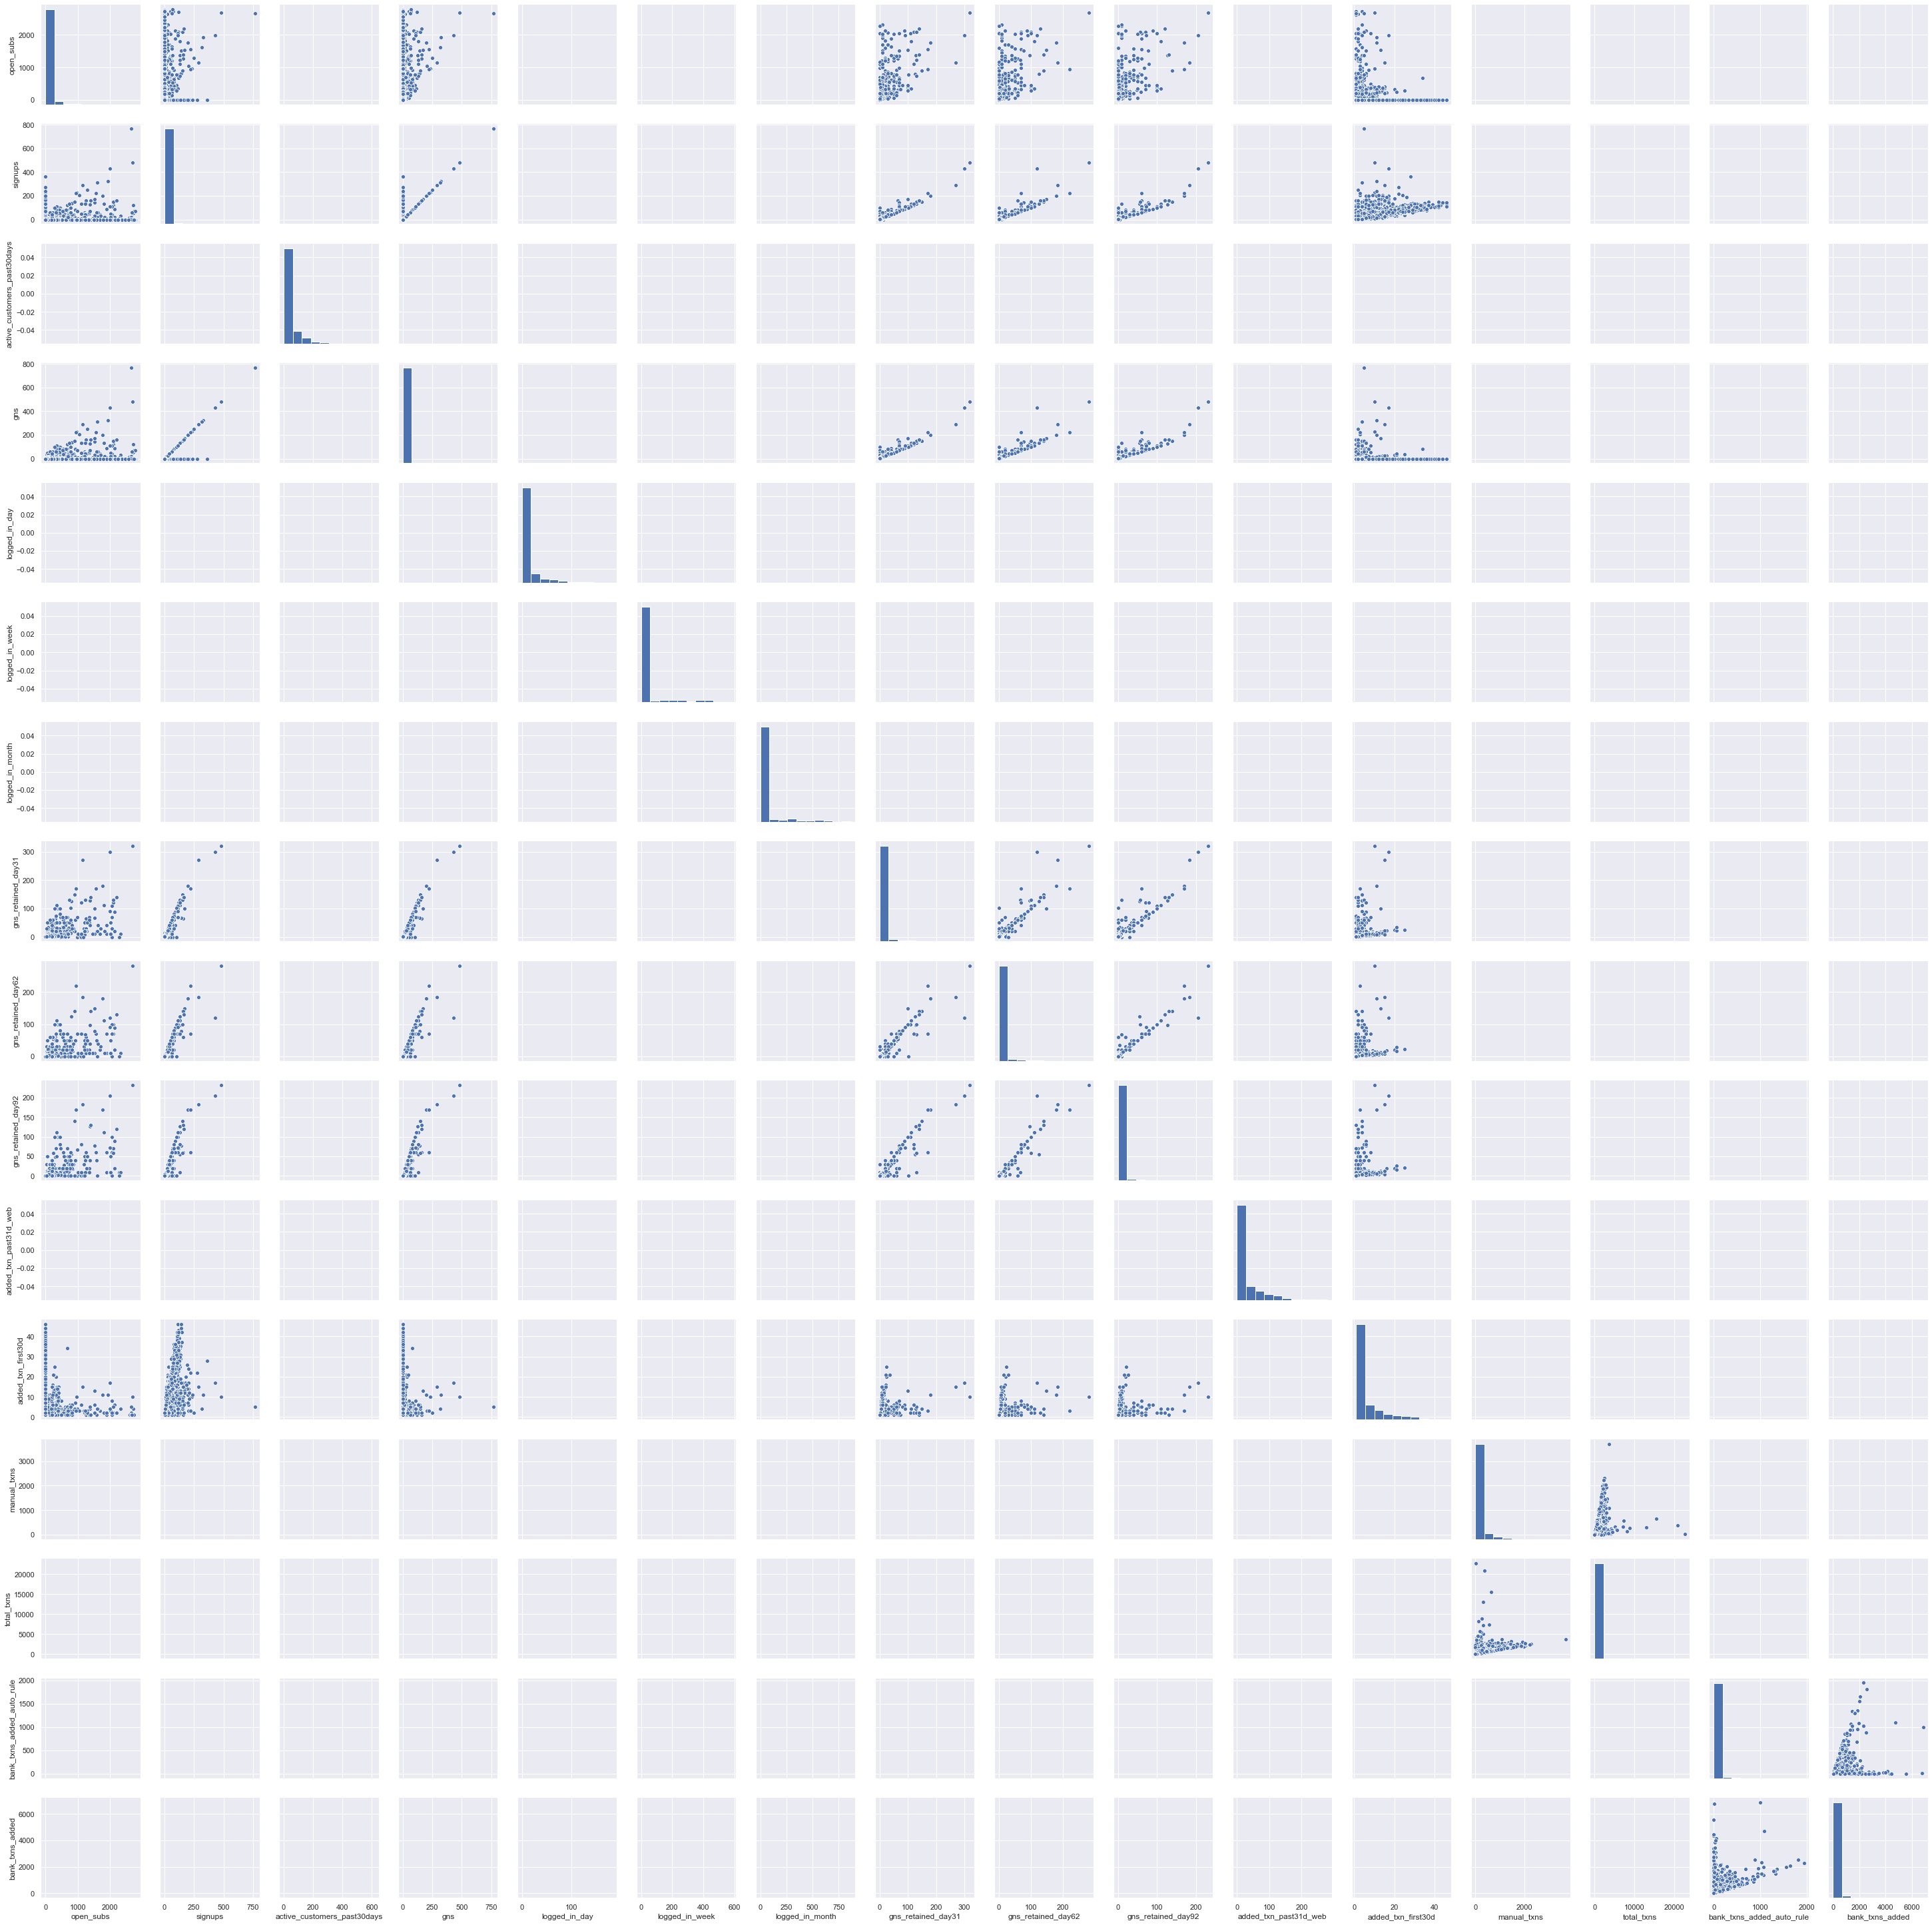

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
sns.pairplot(df_datain_variables , size=2.5)
plt.show()

C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\jcruz10\Anaconda3\lib\site-packages\seaborn\distributions.py:369: UserW

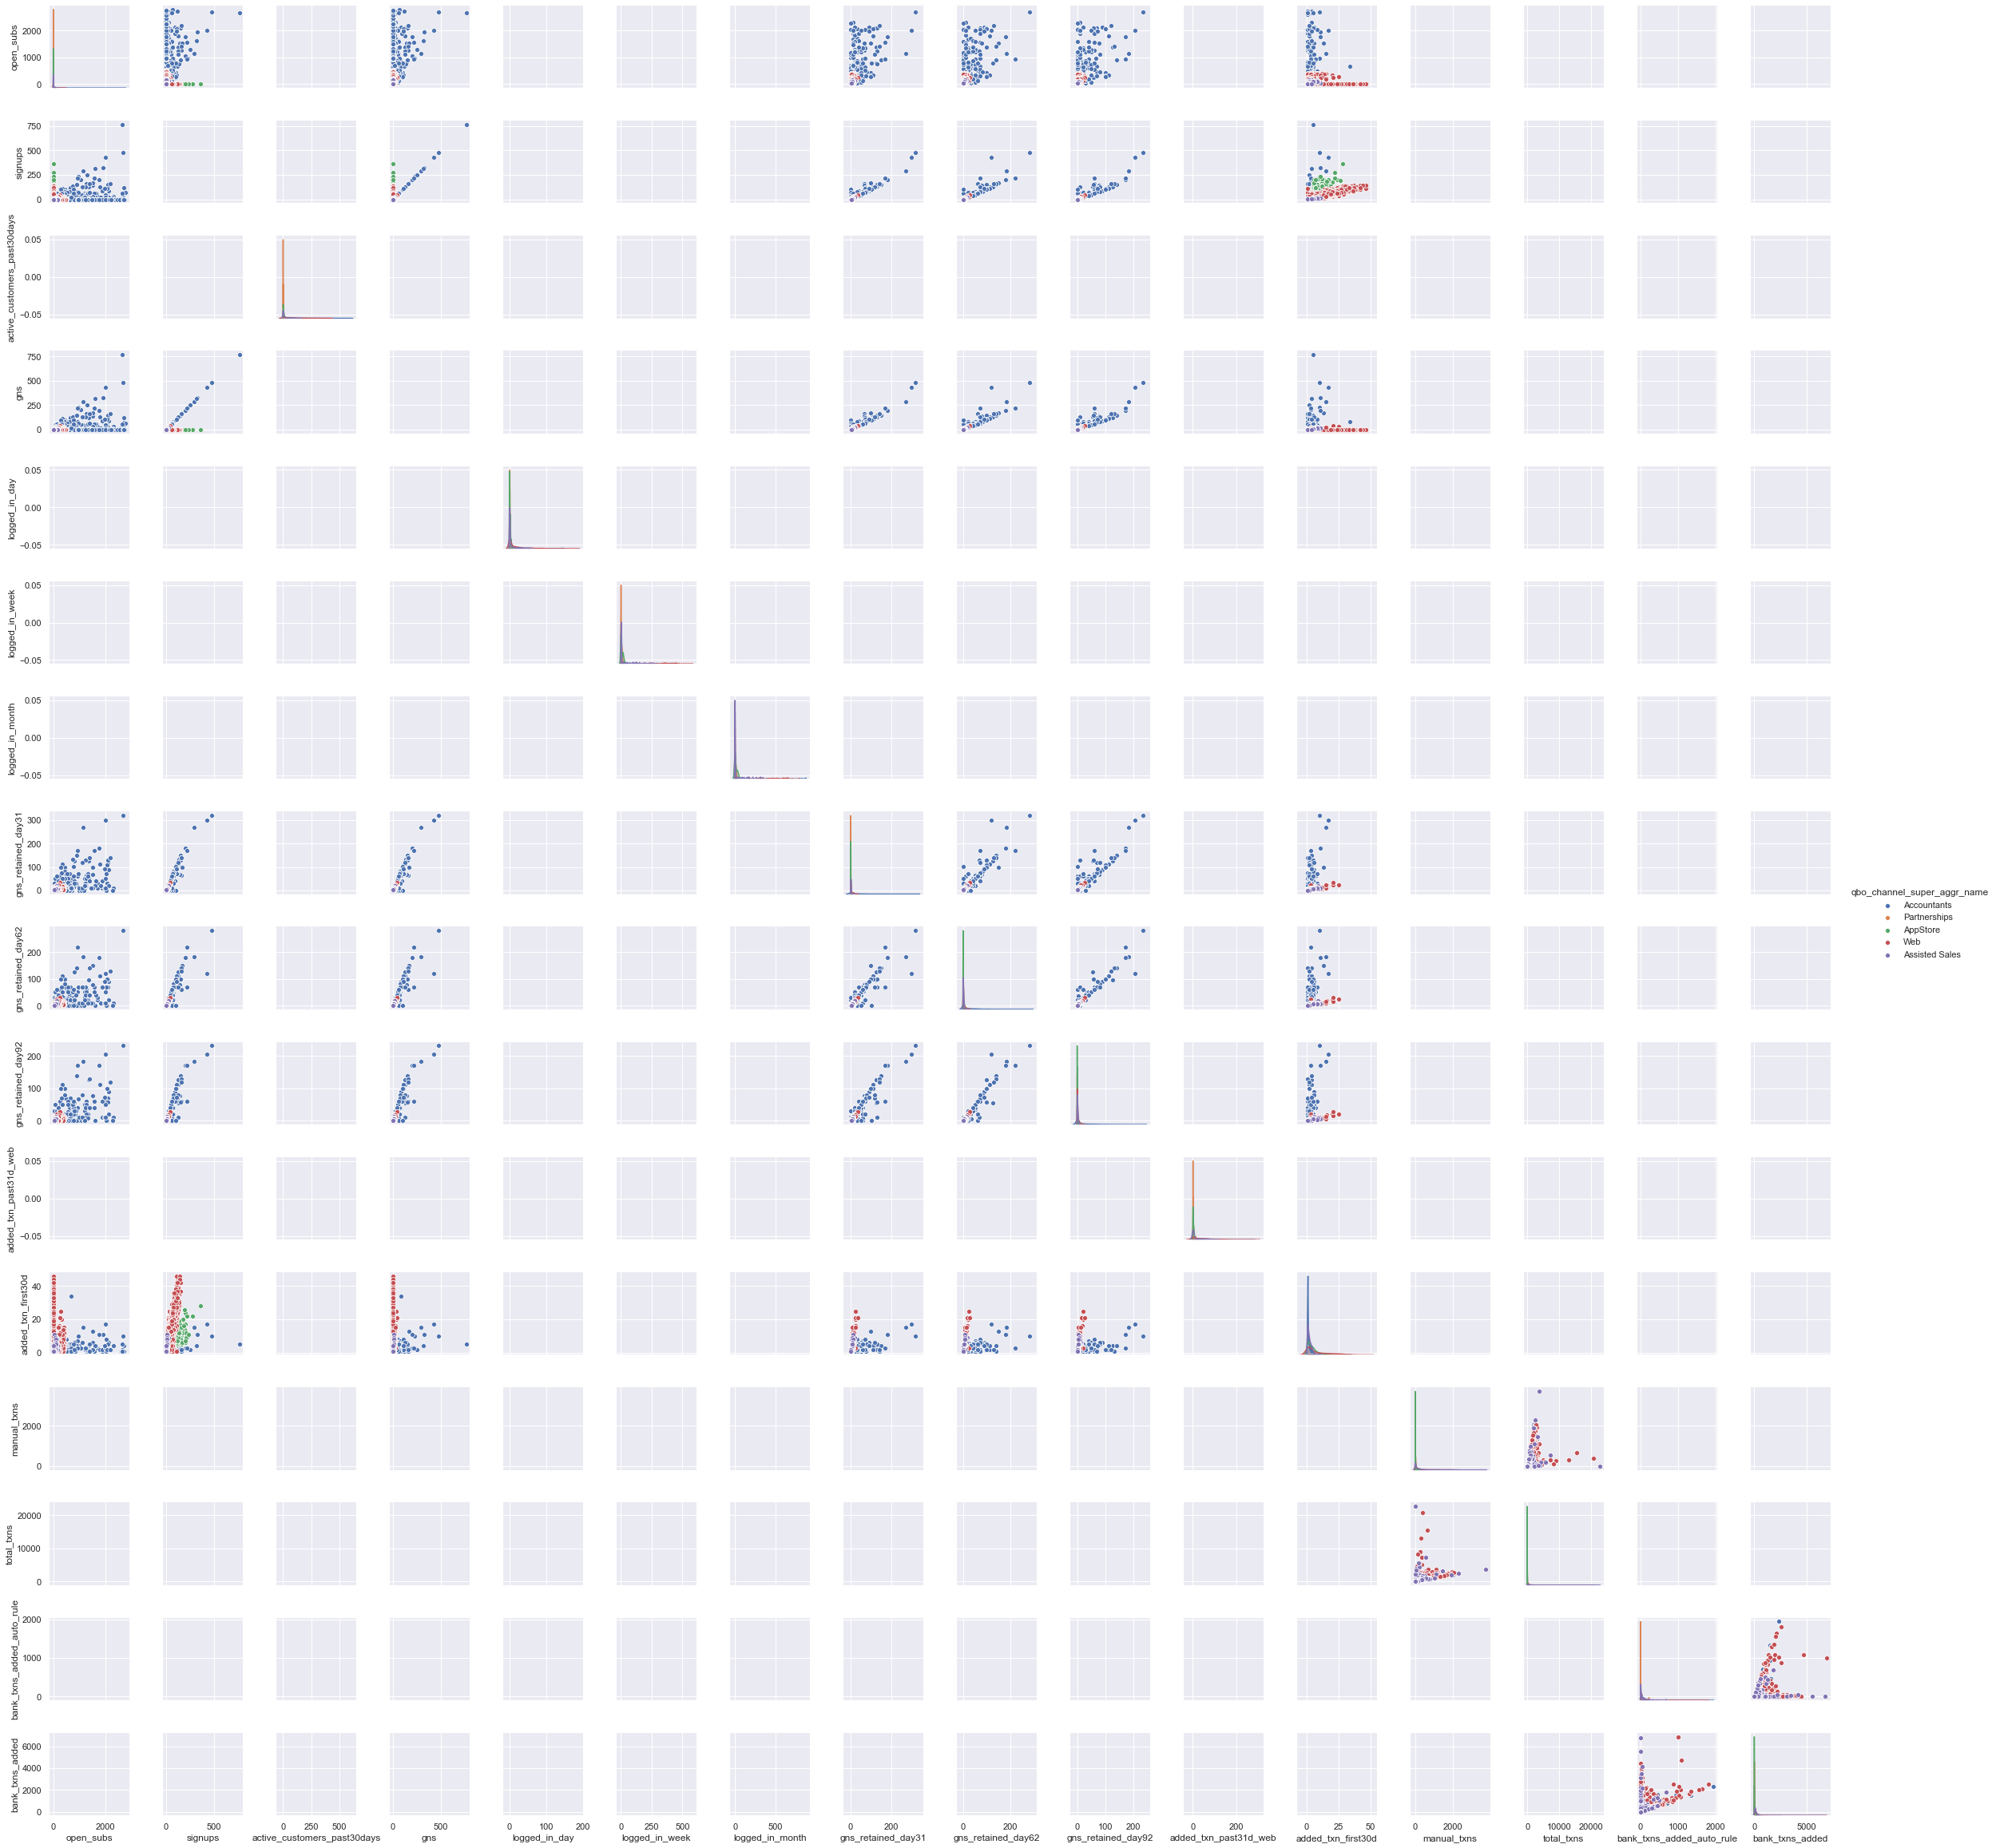

In [33]:
sns.pairplot(df_datain_variables , height=2, hue = 'qbo_channel_super_aggr_name')

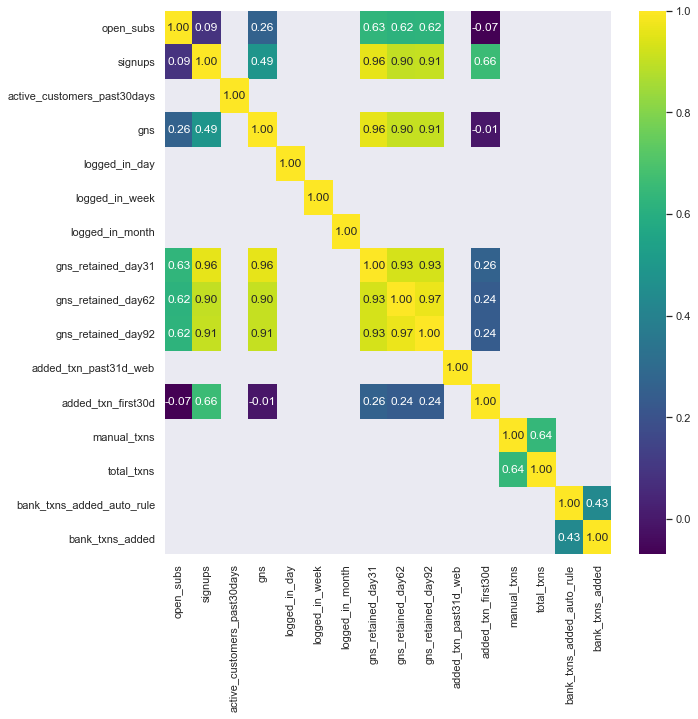

In [34]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(df_datain_variables.corr(), annot=True, cmap="viridis", fmt="0.2f");




In [ ]:
df_datain_variables_numbers = df_datain_variables.drop(df_datain_variables.columns[[0]], axis=1)
df_datain_variables_numbers

In [ ]:
import matplotlib.pyplot as plt

f, axes = plt.subplots(4, 4, figsize=(15, 15))
for ax, feature in zip(axes.flat, df_datain_variables_numbers.columns):
    sns.distplot(df_datain_variables_numbers[feature] , color="skyblue", ax=ax)
plt.show()